In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
np.set_printoptions(suppress=True, precision=5)
%matplotlib inline

In [36]:
# kmeans on a sample data set
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 150, n_features=2, 
                  centers=3, cluster_std=0.5, shuffle=True, random_state=0)

Text(0, 0.5, 'X2')

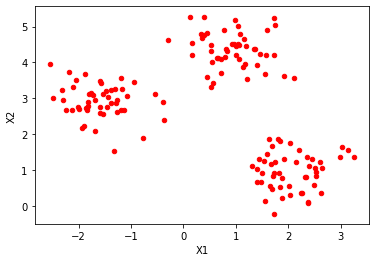

In [37]:
plt.scatter(X[:, 0], X[:, 1], c = "red", s = 20)
plt.xlabel("X1")
plt.ylabel("X2")

In [43]:
# n_clusters : int, optional, default: 8
# The number of clusters to form as well as the number of centroids to generate.

# init : {‘k-means++’, ‘random’ or an ndarray}
# Method for initialization, defaults to ‘k-means++’:

# ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

# ‘random’: choose k observations (rows) at random from data for the initial centroids.

# If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

# n_init : int, default: 10
# Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

# max_iter : int, default: 300
# Maximum number of iterations of the k-means algorithm for a single run.

# tol : float, default: 1e-4
# Relative tolerance with regards to inertia to declare convergence

# precompute_distances : {‘auto’, True, False}
# Precompute distances (faster but takes more memory).

# ‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision.

# True : always precompute distances

# False : never precompute distances

# verbose : int, default 0
# Verbosity mode.

# random_state : int, RandomState instance or None (default)
# Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.

# copy_x : boolean, optional
# When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified, ensuring X is C-contiguous. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean, in this case it will also not ensure that data is C-contiguous which may cause a significant slowdown.

# n_jobs : int or None, optional (default=None)
# The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.

# None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

# algorithm : “auto”, “full” or “elkan”, default=”auto”
# K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient by using the triangle inequality, but currently doesn’t support sparse data. “auto” chooses “elkan” for dense data and “full” for sparse data.



In [84]:
def show_cluster(X, y, estimator = None, ignore_noise = True):
    levels = set(y)
    
    if ignore_noise and -1 in levels:
        levels.remove(-1)
    
    colors = sns.color_palette("husl", len(levels))
    centroids = None 
    if estimator is not None and hasattr(estimator, "cluster_centers_"):
        centroids = estimator.cluster_centers_  

    for k in levels:
        data = X[y == k, :]
        plt.scatter(data[:, 0], data[:, 1], color = colors[k], s = 50, label = "Cluster %s" % k)

    if not centroids is None:
        plt.scatter(centroids[:, 0], centroids[:, 1], color = "black", marker = "*", s = 150)

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend(loc = "lower left")

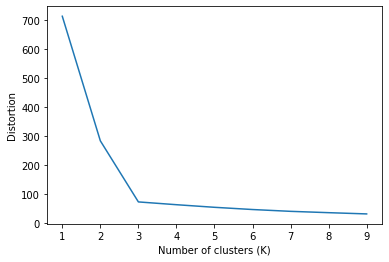

In [38]:
def find_elbow(X,n =10):
    distortions = []
    for i in range(1,n):
        km = KMeans(n_clusters = i,init ="k-means++",n_init = 10,max_iter = 1000,n_jobs = -1, algorithm = "auto")
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1,n),distortions)
    plt.xlabel("Number of clusters (K)")
    plt.ylabel("Distortion")

find_elbow(X)

In [39]:
# elbow at number of clusters =3 
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=3,init="k-means++",n_init = 10,max_iter=1000,n_jobs =-1,algorithm = "auto")
y_km = km.fit_predict(X)

In [40]:
km.labels_

array([0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0])

In [41]:
km.inertia_

72.47601670996698

In [42]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y, y_km)

1.0

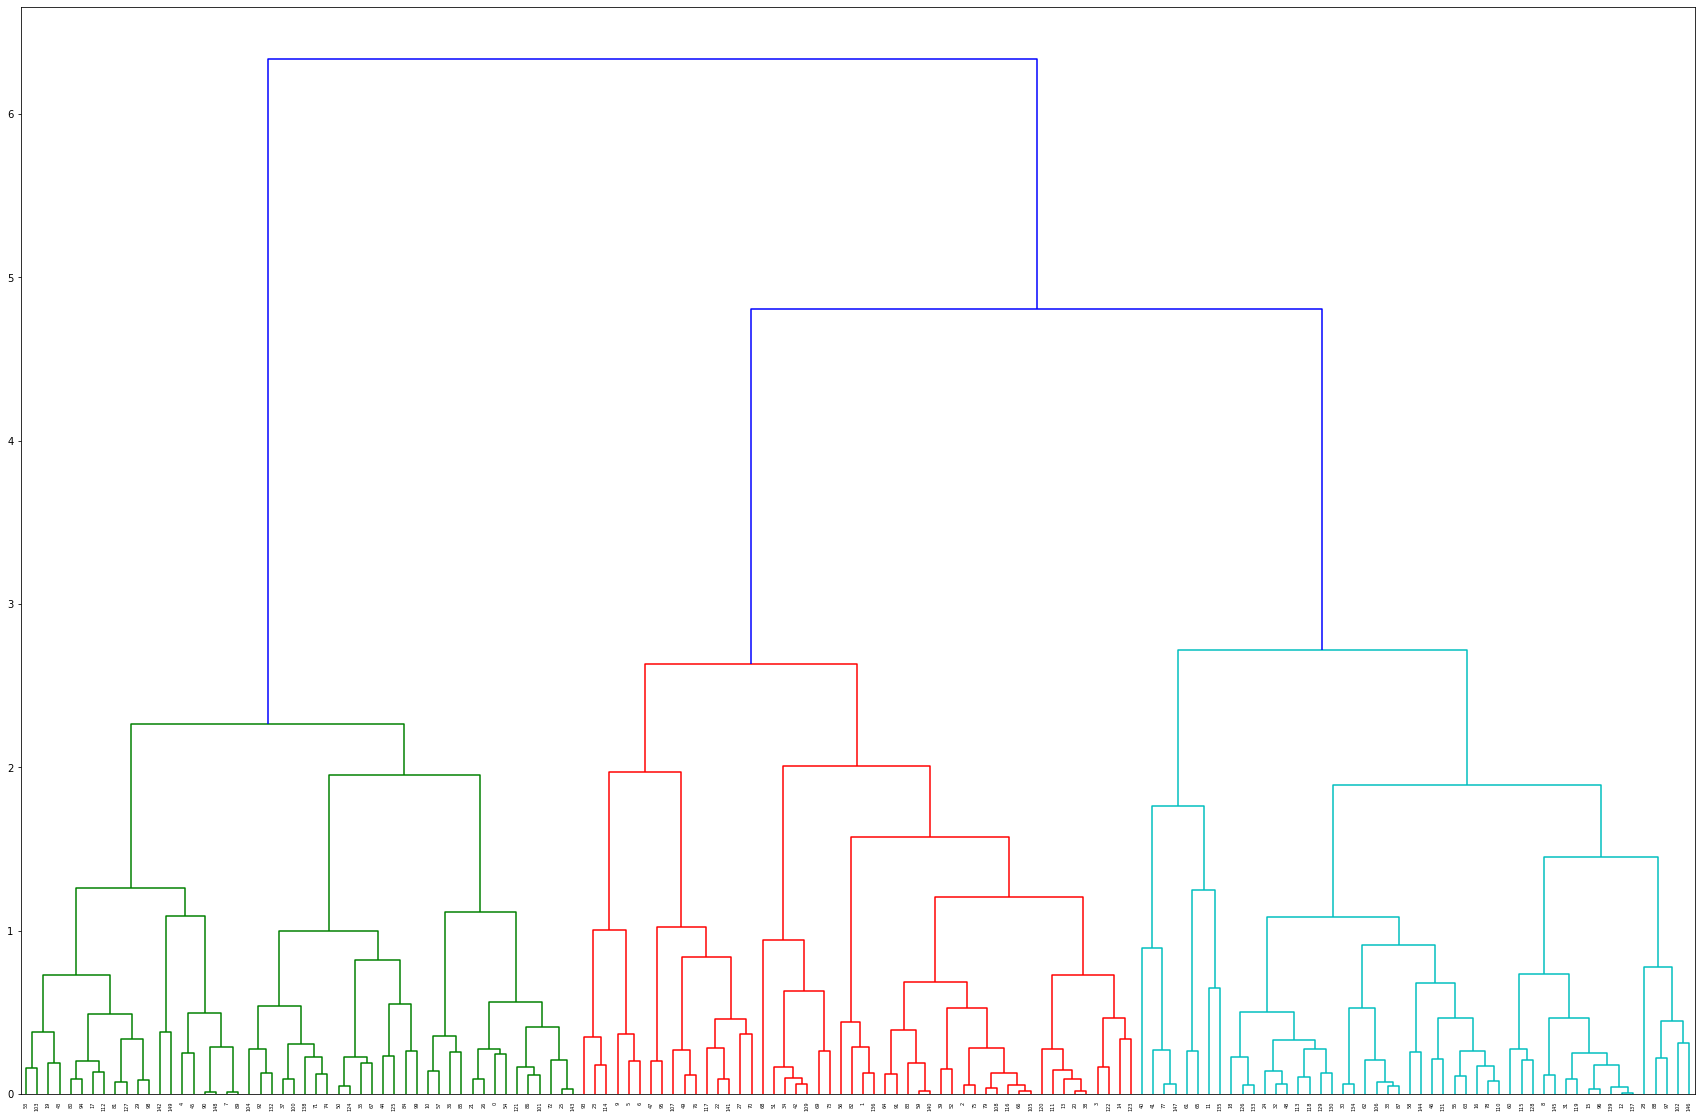

In [52]:
plt.figure(figsize = (30, 20))
from scipy.cluster.hierarchy import linkage , dendrogram
row_clusters = linkage(X,method="complete",metric="euclidean")
f = dendrogram(row_clusters)

In [53]:
from sklearn.datasets import make_moons

In [64]:
X_,y_ = make_moons(n_samples = 200,noise = 0.1,random_state = 123)

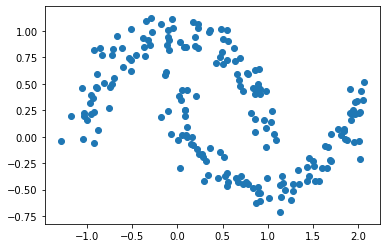

In [65]:
plt.scatter(X_[:,0],X_[:,1])

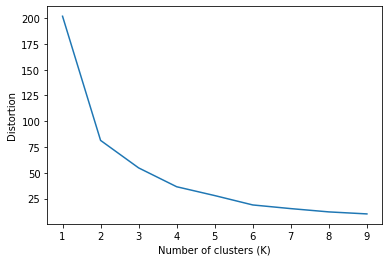

In [66]:
def find_elbow(X,n =10):
    distortions = []
    for i in range(1,n):
        km = KMeans(n_clusters = i,init ="k-means++",n_init = 10,max_iter = 1000,n_jobs = -1, algorithm = "auto")
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1,n),distortions)
    plt.xlabel("Number of clusters (K)")
    plt.ylabel("Distortion")

find_elbow(X_)

In [71]:
# elbow at number of clusters =3 
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=2,init="k-means++",n_init = 10,max_iter=1000,n_jobs =-1,algorithm = "auto")
y__km = km.fit_predict(X_)

In [72]:
km.labels_

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [73]:
km.inertia_

81.4476962783177

# Kmeans not working

In [74]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y_, y__km)

0.17325362750738088

# Using Dbscan

Text(0.5, 1.0, 'Estimated clusters')

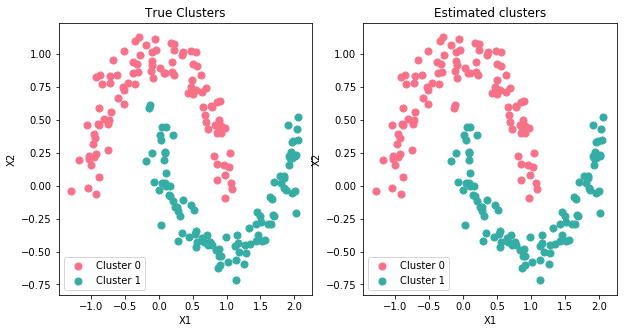

In [98]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.3,min_samples=11,metric='euclidean')
y_db = db.fit_predict(X_)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_cluster(X_, y_, db)
plt.title("True Clusters")
plt.subplot(1, 2, 2)
show_cluster(X_, y_db, db)
plt.title("Estimated clusters")

In [99]:
homogeneity_score(y_,y_db)

0.9289911704819008

In [126]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/movielens/movies.csv")

In [127]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB


In [129]:
df = df[~df["genres"].str.contains("\(no genres listed\)")]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9107 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9107 non-null int64
title      9107 non-null object
genres     9107 non-null object
dtypes: int64(1), object(2)
memory usage: 284.6+ KB


In [130]:
genres = set()
df["genres"].apply(lambda g: genres.update(g.split(r"|")))
genres = list(genres)
genres.sort()
print(genres, len(genres))

['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'] 19


In [132]:
def to_vector(g):
    indices = np.array([genres.index(v) for v in g.split(r"|")])
    l = np.zeros(len(genres))
    l[indices] = 1
    return l

genres_idx = df["genres"].apply(to_vector)
genres_idx

0       [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...
1       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
2       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
5       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
6       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
7       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
8       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9       [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10      [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...
11      [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
12      [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
13      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
14      [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
15      [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...
16      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
17      [0.0, 

In [133]:
X = np.array(genres_idx.tolist())
print("X.shape: ", X.shape)

X.shape:  (9107, 19)


In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape

(9107, 19)

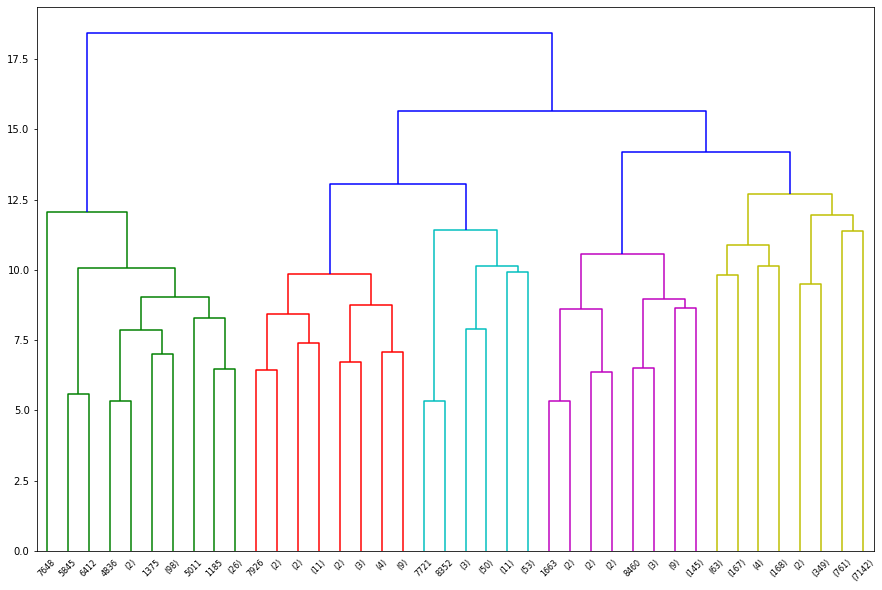

In [135]:
plt.figure(figsize = (15, 10))
row_clusters = linkage(X_std, method="complete", metric="euclidean")
f = dendrogram(row_clusters, p = 5, truncate_mode="level")